<a href="https://colab.research.google.com/github/IcarusBurned/Activation-Functions/blob/master/Image_Classification_in_10_Minutes_with_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving F_test_data.txt to F_test_data.txt
Saving F_test_label.txt to F_test_label (1).txt
Saving F_train_data.txt to F_train_data.txt
Saving F_train_label.txt to F_train_label (1).txt


In [0]:
import tensorflow as tf
import numpy as np
import math
import csv
from sklearn import metrics
from matplotlib import pyplot
from google.colab import files

In [0]:
UseMnist = True
image_size = 28

In [0]:
#load my data set
def load_dataset(s="data"):
    with open('C_train_data.txt') as csv_train_file:
           X_train = np.array(list(csv.reader(csv_train_file, delimiter = ','))).astype("float")  
    with open('F_train_label.txt') as csv_trainl_file:
           labels_train = np.array(list(csv.reader(csv_trainl_file, delimiter = ','))).astype("uint")  
    with open('C_test_data.txt') as csv_test_file:
           X_test = np.array(list(csv.reader(csv_test_file, delimiter = ','))).astype("float")
    with open('F_test_label.txt') as csv_testl_file:
           labels_test = np.array(list(csv.reader(csv_testl_file, delimiter = ','))).astype("uint")  
    X_train = X_train/X_train.max()
    X_test = X_test/X_test.max()
    #shuffle the training arrays, not sure if this matters
    s = np.arange(0, len(X_train), 1)
    np.random.shuffle(s)
    X_train = X_train[s]
    labels_train = labels_train[s]
    return (X_train, labels_train), (X_test, labels_test)
  
  
if(UseMnist):
  #load standard MNIST data set
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
else:
  (x_train, y_train), (x_test, y_test) = load_dataset()
 

In [0]:
if(False == UseMnist):
  col = np.zeros((60000,3))
  x_train = np.hstack((x_train, col))
  tcol = np.zeros((10000, 3))
  x_test = np.hstack((x_test, tcol))
  x_train = x_train.reshape(x_train.shape[0], image_size, image_size)
  x_test = x_test.reshape(x_test.shape[0], image_size, image_size)


## Image Classification in 10 Minutes with MNIST Dataset, adapted from Orhan Gazi Yalzin

0


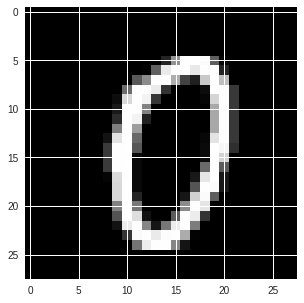

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
i = 1000 # You may select anything up to 60,000
yo = x_train[i].reshape(image_size, image_size)
print(y_train[i])
plt.figure(figsize=(5, 5))
plt.imshow(yo, cmap = 'gray')

In [0]:
PIx2 = 2.0*tf.constant(math.pi)
PI = tf.constant(math.pi)

def ReLU(x):
  return tf.maximum(0.0, x)

def xsinxRelu(x):
  return tf.maximum(0.0,1.0/PIx2*(PIx2*x - tf.sin(PIx2*x)))

def expxsinxRelu(x):
  s = 1.0
  return tf.maximum(0.0,1.0/PIx2*(PIx2*x - tf.exp(-s*tf.square(x))* tf.sin(PIx2*x)))

def xsinxSigmoid(x):
  y = tf.minimum(1.0, tf.maximum(0.0,1.0/(PIx2)*((x + PI) - tf.sin((x + PI)))))
  return y / tf.reduce_sum(y)

def lisht(x):
  return x*(tf.exp(x) - tf.exp(-x))/(tf.exp(x) + tf.exp(-x))

def swish(x):
  return x*tf.exp(x)/(tf.exp(x) + 1)



In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1)
input_shape = (image_size, image_size, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

if(UseMnist):
  x_train = x_train/255
  x_test = x_test/255

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
#some variables for collecting history of various activation functions
H = []
TR = []
RELU = 0
XSINX = 1
EXSINX = 2
SWISH = 3
LISHT = 4

dict = {0:ReLU, 1:xsinxRelu, 2:expxsinxRelu, 3:swish, 4:lisht}
names = {0:"ReLU", 1:"xsinxRelu", 2:"expxsinxRelu", 3:"swish", 4:"lisht"}

In [74]:

for i in range(5): 
  # Importing the required Keras modules containing model and layers
  from keras.models import Sequential
  from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
  # Creating a Sequential Model and adding the layers
  model = Sequential()
  model.add(Conv2D(image_size, kernel_size=(4,4), input_shape=input_shape, padding = 'same'))
  model.add(MaxPooling2D(pool_size=(4,4)))
  model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
  #Use 196 for my data
  model.add(Dense(128, activation=dict[4]))
  #model.add(Dense(128, activation=tf.nn.relu))
  #model.add(Dense(128, activation = xsinxRelu))
  #model.add(Dense(128, activation = expxsinxRelu))
  #model.add(Dense(128, activation = swish))
  #model.add(Dense(128, activation = lisht))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation=tf.nn.softmax))
  #model.add(Dense(10,activation=xsinxSigmoid))
  
  model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
  print(names[i])
  H.append(model.fit(x=x_train,y=y_train, epochs=30, verbose = 0))
  
  TR.append(model.evaluate(x_test, y_test))

ReLU
10000/10000 [==============================] - 1s 139us/step
xsinxRelu
10000/10000 [==============================] - 1s 121us/step
expxsinxRelu
10000/10000 [==============================] - 1s 122us/step
swish
10000/10000 [==============================] - 1s 132us/step
lisht
10000/10000 [==============================] - 1s 126us/step


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
H[0] = model.fit(x=x_train,y=y_train, epochs=30)

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


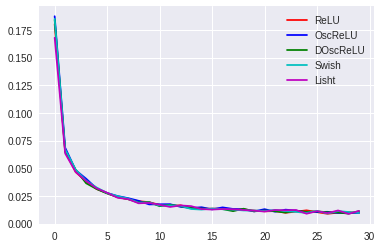

In [95]:
# plot metrics
pyplot.plot(H[0].history['loss'], 'r', label='ReLU')
pyplot.plot(H[1].history['loss'], 'b', label='OscReLU')
pyplot.plot(H[2].history['loss'], 'g', label='DOscReLU')
pyplot.plot(H[3].history['loss'], 'c', label='Swish')
pyplot.plot(H[4].history['loss'], 'm', label='Lisht')
pyplot.legend(loc='upper right')
from google.colab import files
plt.savefig("MNIST_CNN_LOSS.png")
files.download("MNIST_CNN_LOSS.png") 


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottem right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


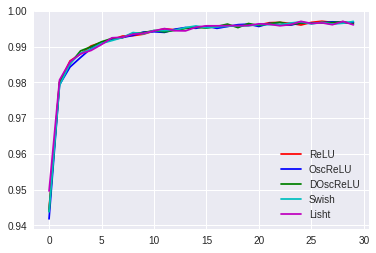

In [97]:
# plot metrics
pyplot.plot(H[0].history['acc'], 'r', label='ReLU')
pyplot.plot(H[1].history['acc'], 'b', label='OscReLU')
pyplot.plot(H[2].history['acc'], 'g', label='DOscReLU')
pyplot.plot(H[3].history['acc'], 'c', label='Swish')
pyplot.plot(H[4].history['acc'], 'm', label='Lisht')
pyplot.legend(loc='bottem right')
from google.colab import files
plt.savefig("MNIST_CNN_ACC.png")
files.download("MNIST_CNN_ACC.png") 


In [98]:
# plot metrics
print(TR[0][1], 'ReLU')
print(TR[1][1], 'OscReLU')
print(TR[2][1], 'DOscReLU')
print(TR[3][1], 'Swish')
print(TR[4][1], 'Lisht')


0.9898 ReLU
0.9893 OscReLU
0.9902 DOscReLU
0.9878 Swish
0.9897 Lisht


In [48]:

TR.append(model.evaluate(x_test, y_test))

(60000,)
10000/10000 [==============================] - 1s 80us/step
[0.046798870817062924, 0.9881]


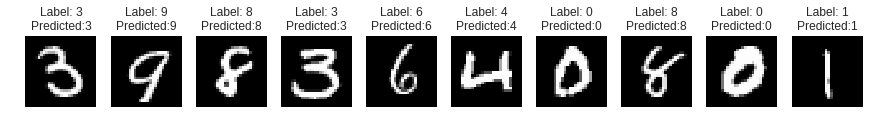

In [35]:

preds = model.predict(x_test)
n_examples = np.random.randint(1, 10000, 10)
plt.figure(figsize=(15, 15))
for i in range(10):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(x_test[n_examples[i], :, :, 0], cmap='gray')
  plt.title("Label: {}\nPredicted:{}".format(y_test[n_examples[i]], np.argmax(preds[n_examples[i]])))
  plt.axis('off')

In [36]:
predictions = []
for i in range(preds.shape[0]):
  predictions.append(np.argmax(preds[i]))
predictions = np.array(predictions)
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, predictions)))
print(metrics.confusion_matrix(y_test, predictions))
print("Accuracy={}".format(metrics.accuracy_score(y_test, predictions)))

Classification report for classifier <keras.engine.sequential.Sequential object at 0x7eff5f238f28>:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1132    2    1    0    0    0    0    0    0]
 [   2    0 1019    1    2    0   

112


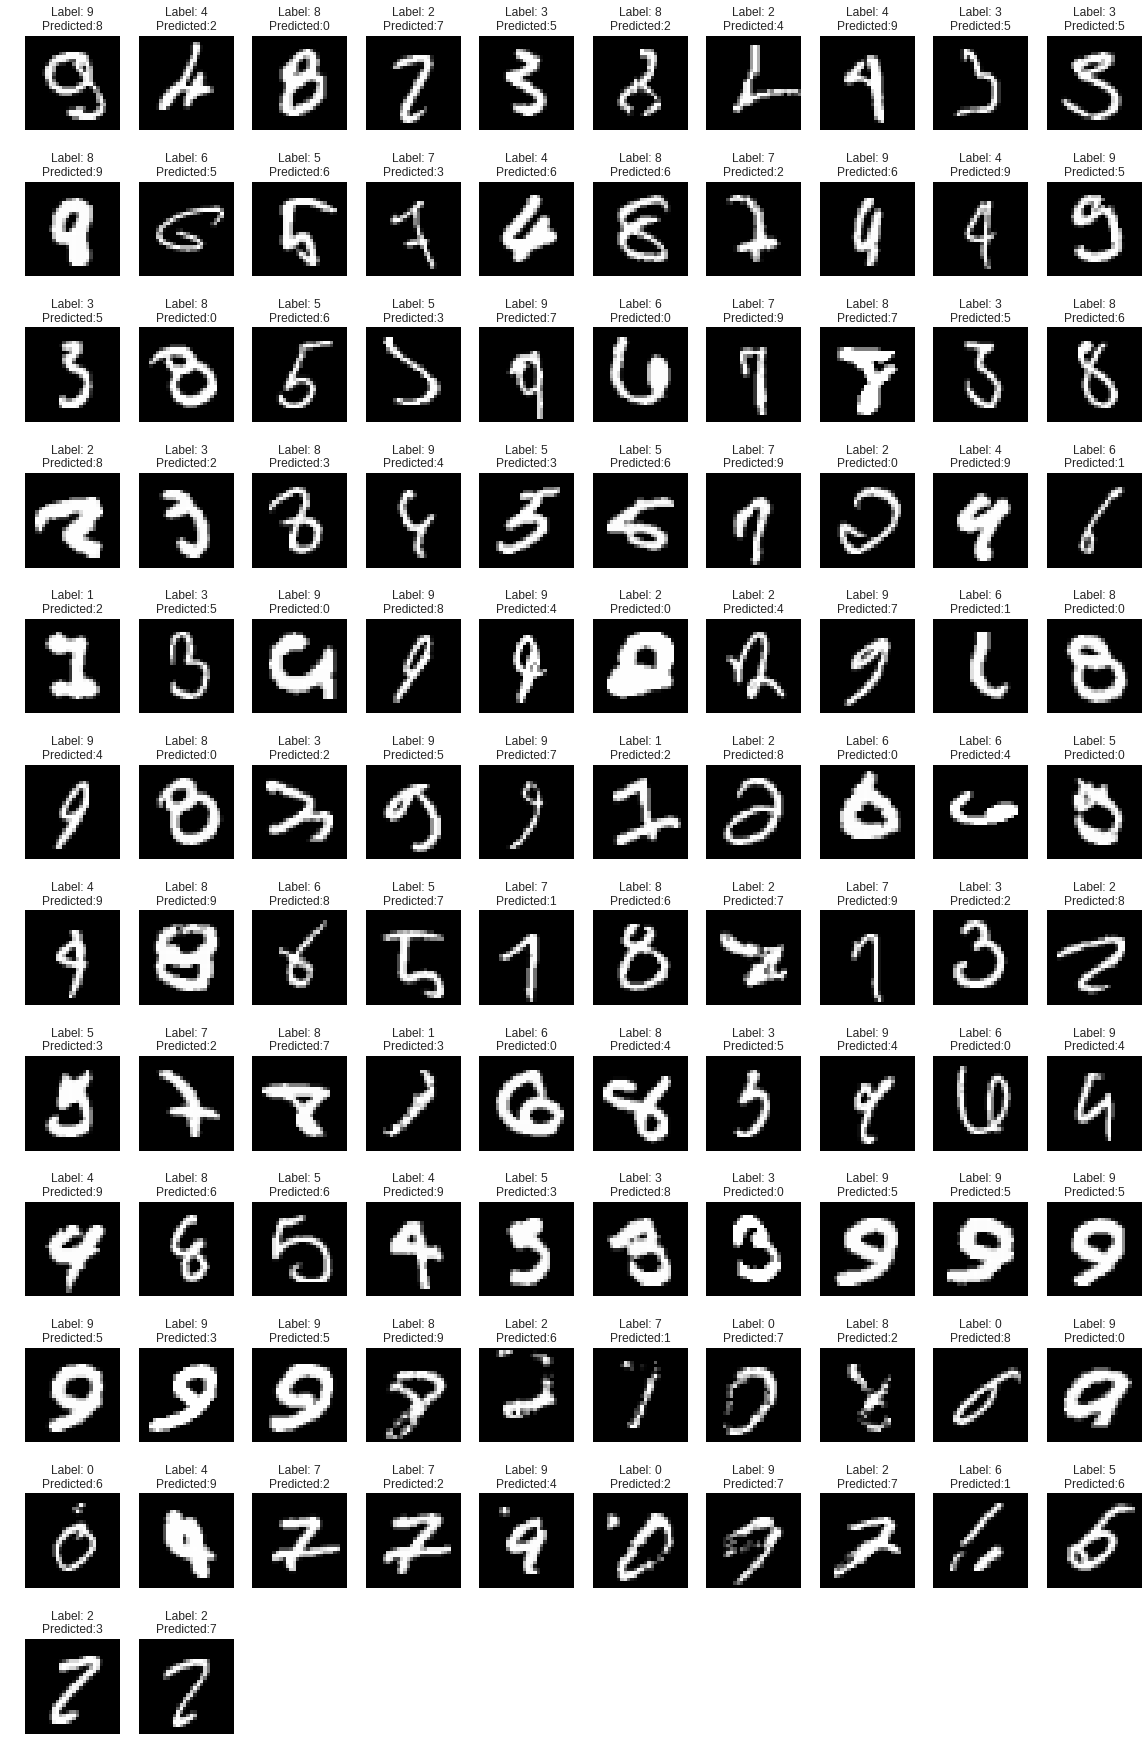

In [38]:
incor = []
for i in range(len(y_test)):
  label = y_test[i]
  pred = np.argmax(preds[i])  
  if label != pred:
    incor.append(i)
incorrect = np.array(incor)

print(incorrect.shape[0])
n_examples = np.random.randint(1, incorrect.shape[0], 300)

plt.figure(figsize=(20, 80))
for i in range(incorrect.shape[0]):
  ax = plt.subplot(30, 10, i + 1)
  plt.imshow(x_test[incorrect[i], :, :, 0], cmap='gray')
  plt.title("Label: {}\nPredicted:{}".format(y_test[incorrect[i]], np.argmax(preds[incorrect[i]])))
  plt.axis('off')